In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('data/aggregated_df.csv')
df.columns

Index(['match_id', 'inning', 'bowling_team', 'batter', 'batter_total_balls',
       'batter_SR', 'batter_score', 'dismissal_kind', 'date', 'match_type',
       'venue', 'no_of_right_arm_pacers_faced', 'no_of_left_arm_pacers_faced',
       'no_of_right_arm_offspinners_faced', 'no_of_left_arm_offpacers_faced',
       'no_of_right_arm_legspinners_faced', 'no_of_left_arm_legspinners_faced',
       'no_of_left_arm_offspinners_faced', 'score_last_5', 'balls_last_5',
       'score_last_1', 'balls_last_1', 'score_last_2', 'balls_last_2',
       'score_last_3', 'balls_last_3', 'score_last_4', 'balls_last_4'],
      dtype='object')

In [16]:
df.drop(columns=['batter_total_balls', "batter_SR", "dismissal_kind", "match_id", "date", "no_of_left_arm_offpacers_faced"], inplace=True)

In [17]:
df = df.reindex(columns=[col for col in df.columns if col != 'batter_score'] + ['batter_score'])
df.columns

Index(['inning', 'bowling_team', 'batter', 'match_type', 'venue',
       'no_of_right_arm_pacers_faced', 'no_of_left_arm_pacers_faced',
       'no_of_right_arm_offspinners_faced',
       'no_of_right_arm_legspinners_faced', 'no_of_left_arm_legspinners_faced',
       'no_of_left_arm_offspinners_faced', 'score_last_5', 'balls_last_5',
       'score_last_1', 'balls_last_1', 'score_last_2', 'balls_last_2',
       'score_last_3', 'balls_last_3', 'score_last_4', 'balls_last_4',
       'batter_score'],
      dtype='object')

In [18]:
player = 'G Gambhir'
gdf = df[df['batter'] == player]
gdf.drop(columns=['batter'], inplace=True)

gdf = gdf.fillna(-1).astype({"no_of_left_arm_offspinners_faced": 'int', "score_last_5": 'int', "balls_last_5": 'int', "score_last_1": 'int', "balls_last_1": 'int', "score_last_2": 'int', "balls_last_2": 'int', "score_last_3": 'int', "balls_last_3": 'int', "score_last_4": 'int', "balls_last_4": 'int'})

print(gdf.dtypes)

inning                                int64
bowling_team                         object
match_type                           object
venue                                object
no_of_right_arm_pacers_faced          int64
no_of_left_arm_pacers_faced           int64
no_of_right_arm_offspinners_faced     int64
no_of_right_arm_legspinners_faced     int64
no_of_left_arm_legspinners_faced      int64
no_of_left_arm_offspinners_faced      int32
score_last_5                          int32
balls_last_5                          int32
score_last_1                          int32
balls_last_1                          int32
score_last_2                          int32
balls_last_2                          int32
score_last_3                          int32
balls_last_3                          int32
score_last_4                          int32
balls_last_4                          int32
batter_score                          int64
dtype: object


C:\Users\Pranav Koka\AppData\Local\Temp\ipykernel_2744\1501815584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf.drop(columns=['batter'], inplace=True)


In [19]:
X = gdf.iloc[:, :-1].values
y = gdf.iloc[:, -1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
ct1 = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [-18])], remainder = 'passthrough')
ct2 = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [-17])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X = np.array(ct1.fit_transform(X))
X = np.array(ct2.fit_transform(X))

In [20]:
y = y.reshape(len(y), 1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train[:, X_train.shape[1] - 17:] = sc_X.fit_transform(X_train[:, X_train.shape[1] - 17:])
X_test[:, X_train.shape[1] - 17:] = sc_X.transform(X_test[:, X_train.shape[1] - 17:])
y_train = sc_y.fit_transform(y_train)

In [23]:
y_train = y_train.ravel()
y_test = y_test.ravel()

[[ 1.11  1.  ]
 [69.15 63.  ]
 [18.59  1.  ]
 [ 8.17  4.  ]
 [35.24 31.  ]
 [26.16  1.  ]
 [26.68 29.  ]
 [ 4.55  0.  ]
 [33.25 25.  ]
 [53.74 41.  ]
 [14.3  14.  ]
 [51.58 54.  ]
 [29.13 59.  ]
 [24.98 16.  ]
 [64.65 56.  ]
 [49.81 57.  ]
 [ 3.81  8.  ]
 [62.53 45.  ]
 [28.77 18.  ]
 [24.21 16.  ]
 [ 9.76  6.  ]
 [60.83 62.  ]
 [11.5   8.  ]
 [ 6.57 10.  ]
 [70.52 51.  ]
 [44.38 18.  ]
 [82.56 48.  ]
 [40.26 21.  ]
 [63.77 69.  ]
 [34.65 27.  ]
 [44.91 62.  ]]
r2_score is 0.6209443493825157


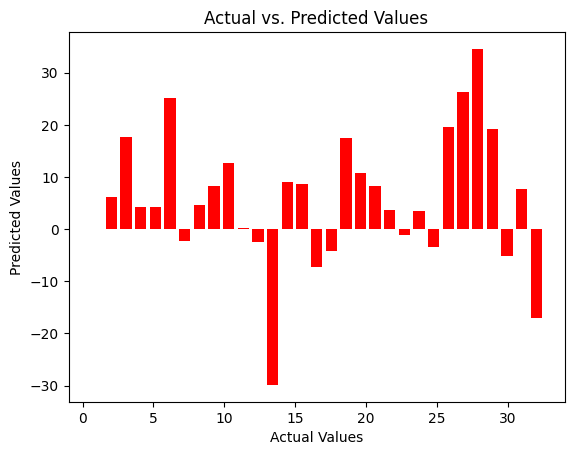

In [24]:
def MLR(X_train, y_train, X_test, y_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))

    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_pred_1d - y_test_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    #plt.bar(a, y_test_1d, color = 'blue', label = 'Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()

MLR(X_train, y_train, X_test, y_test)

[[17.  1.]
 [34. 63.]
 [ 3.  1.]
 [22.  4.]
 [ 9. 31.]
 [ 8.  1.]
 [19. 29.]
 [15.  0.]
 [28. 25.]
 [36. 41.]
 [ 3. 14.]
 [47. 54.]
 [12. 59.]
 [66. 16.]
 [34. 56.]
 [72. 57.]
 [ 8.  8.]
 [57. 45.]
 [ 9. 18.]
 [22. 16.]
 [19.  6.]
 [33. 62.]
 [15.  8.]
 [ 8. 10.]
 [75. 51.]
 [60. 18.]
 [19. 48.]
 [50. 21.]
 [86. 69.]
 [22. 27.]
 [12. 62.]]
r2_score is -0.02426699244780095


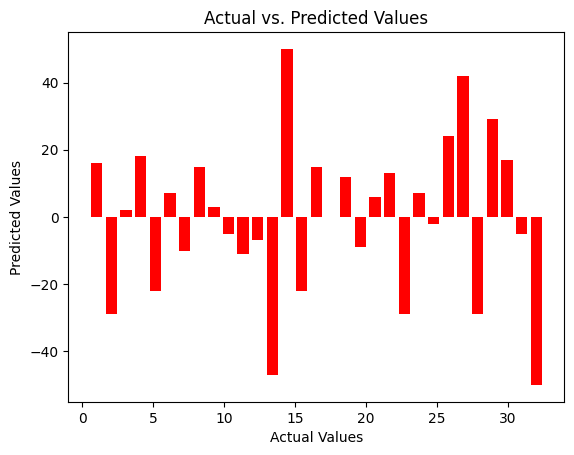

In [25]:
def DT(X_train, y_train, X_test, y_test):
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import r2_score
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train,y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))

    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_pred_1d - y_test_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()

DT(X_train, y_train, X_test, y_test)

[[10.2  1. ]
 [53.9 63. ]
 [ 5.4  1. ]
 [29.7  4. ]
 [28.7 31. ]
 [ 9.9  1. ]
 [30.1 29. ]
 [ 4.9  0. ]
 [26.1 25. ]
 [37.4 41. ]
 [11.3 14. ]
 [54.8 54. ]
 [30.8 59. ]
 [39.9 16. ]
 [45.3 56. ]
 [29.5 57. ]
 [15.3  8. ]
 [43.1 45. ]
 [20.2 18. ]
 [21.6 16. ]
 [12.9  6. ]
 [47.7 62. ]
 [ 7.1  8. ]
 [10.9 10. ]
 [41.8 51. ]
 [53.1 18. ]
 [51.9 48. ]
 [48.7 21. ]
 [49.6 69. ]
 [21.1 27. ]
 [15.7 62. ]]
r2_score is 0.4760942873126347


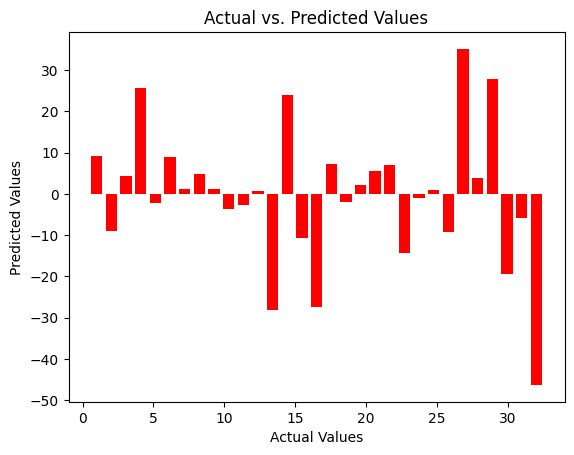

In [26]:
def RF(X_train, y_train, X_test, y_test):    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import r2_score
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))
    
    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()
    
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_pred_1d - y_test_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()

RF(X_train, y_train, X_test, y_test)

[[-1.86  1.  ]
 [39.37 63.  ]
 [15.5   1.  ]
 [19.52  4.  ]
 [32.53 31.  ]
 [ 7.59  1.  ]
 [43.64 29.  ]
 [ 3.56  0.  ]
 [21.07 25.  ]
 [38.11 41.  ]
 [11.55 14.  ]
 [44.48 54.  ]
 [27.19 59.  ]
 [46.94 16.  ]
 [34.98 56.  ]
 [43.15 57.  ]
 [ 6.69  8.  ]
 [52.19 45.  ]
 [25.4  18.  ]
 [20.54 16.  ]
 [20.88  6.  ]
 [36.11 62.  ]
 [ 8.73  8.  ]
 [16.98 10.  ]
 [43.3  51.  ]
 [40.68 18.  ]
 [38.84 48.  ]
 [28.23 21.  ]
 [43.36 69.  ]
 [16.42 27.  ]
 [25.12 62.  ]]
r2_score is 0.4948903867735591


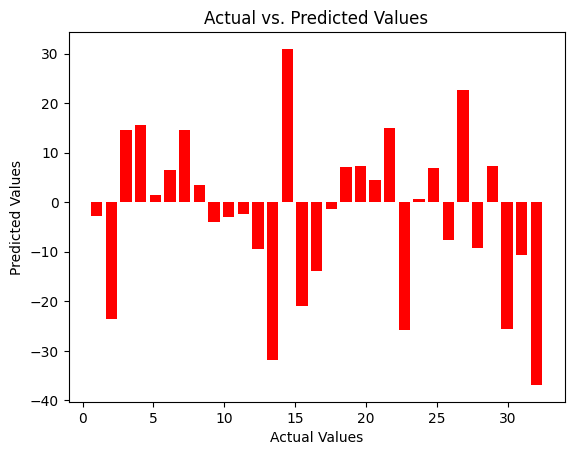

In [27]:
def SVR(X_train, y_train, X_test, y_test):    
    from sklearn.svm import SVR
    from sklearn.metrics import r2_score
    import matplotlib.pyplot as plt
    regressor = SVR(kernel = 'rbf')
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))

    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_pred_1d - y_test_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()
    
    

SVR(X_train, y_train, X_test, y_test)
